## FORCE hackathon company network

Data is from [this blog post](https://agilescientific.com/blog/2018/9/27/force-ml-hackathon-project-round-up).

You will need to install `networkx` in your environment:

    pip install networkx

Here's the team makeup: e.g. the first team had 4 people from Cognite and one from AkerBP, etc. For some reason I made this as a tab-delimted string...

In [1]:
data = """
Cognite	AkerBP	Cognite	Cognite	Cognite	
ESA	ESA	ESA	Kalkulo	NTNU	AkerBP	
Dig	RSI	Imperial	Equinor	DEA	Eni	Emerson
DTU	UiB	SLB	DEA	NPD	
Emerson	Kadme	COP	Accenture
Equinor	Equinor	Equinor	CRC	XOM	Cegal
Equinor	Equinor	SLB	UiB	Cegal
COP	COP	COP	Cegal	Cegal	Cegal	AkerBP
COP	CapGemini	CapGemini	CapGemini	CapGemini	CapGemini
"""

Now we need this as a list of lists...

In [2]:
data = list(filter(None, [list(filter(None, d.split('\t'))) for d in data.split('\n')]))

dataset = list(map(set, data))

In [3]:
data

[['Cognite', 'AkerBP', 'Cognite', 'Cognite', 'Cognite'],
 ['ESA', 'ESA', 'ESA', 'Kalkulo', 'NTNU', 'AkerBP'],
 ['Dig', 'RSI', 'Imperial', 'Equinor', 'DEA', 'Eni', 'Emerson'],
 ['DTU', 'UiB', 'SLB', 'DEA', 'NPD'],
 ['Emerson', 'Kadme', 'COP', 'Accenture'],
 ['Equinor', 'Equinor', 'Equinor', 'CRC', 'XOM', 'Cegal'],
 ['Equinor', 'Equinor', 'SLB', 'UiB', 'Cegal'],
 ['COP', 'COP', 'COP', 'Cegal', 'Cegal', 'Cegal', 'AkerBP'],
 ['COP', 'CapGemini', 'CapGemini', 'CapGemini', 'CapGemini', 'CapGemini']]

In [4]:
dataset

[{'AkerBP', 'Cognite'},
 {'AkerBP', 'ESA', 'Kalkulo', 'NTNU'},
 {'DEA', 'Dig', 'Emerson', 'Eni', 'Equinor', 'Imperial', 'RSI'},
 {'DEA', 'DTU', 'NPD', 'SLB', 'UiB'},
 {'Accenture', 'COP', 'Emerson', 'Kadme'},
 {'CRC', 'Cegal', 'Equinor', 'XOM'},
 {'Cegal', 'Equinor', 'SLB', 'UiB'},
 {'AkerBP', 'COP', 'Cegal'},
 {'COP', 'CapGemini'}]

In [5]:
from itertools import combinations

edges = []
for d in data:
    combs = combinations(d, 2)
    edges += list(combs)

In [10]:
from collections import Counter

edges = [(k[0], k[1], v) for k, v in Counter(edges).items()]

In [11]:
import networkx as nx

G = nx.Graph()

G.add_weighted_edges_from(edges)

/home/matt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


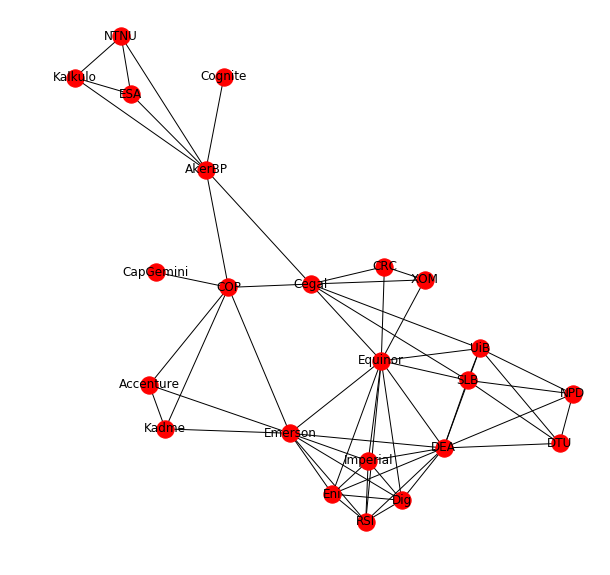

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
nx.draw(G, with_labels=True)

Counts of participants per organization...

In [13]:
from collections import Counter

p = Counter(i for sub in data for i in sub)

p

Counter({'Accenture': 1,
         'AkerBP': 3,
         'COP': 5,
         'CRC': 1,
         'CapGemini': 5,
         'Cegal': 5,
         'Cognite': 4,
         'DEA': 2,
         'DTU': 1,
         'Dig': 1,
         'ESA': 3,
         'Emerson': 2,
         'Eni': 1,
         'Equinor': 6,
         'Imperial': 1,
         'Kadme': 1,
         'Kalkulo': 1,
         'NPD': 1,
         'NTNU': 1,
         'RSI': 1,
         'SLB': 2,
         'UiB': 2,
         'XOM': 1})

Type of organization: 0 for government, 1 for operator, 2 for service, 3 for academic.

In [14]:
t = {
 'Accenture': 2,
 'AkerBP': 1,
 'COP': 1,
 'CRC': 1,
 'CapGemini': 2,
 'Cegal': 2,
 'Cognite': 2,
 'DEA': 1,
 'DTU': 3,
 'Dig': 2,
 'ESA': 2,
 'Emerson': 2,
 'Eni': 1,
 'Equinor': 1,
 'Imperial': 3,
 'Kadme': 2,
 'Kalkulo': 2,
 'NPD': 0,
 'NTNU': 3,
 'RSI': 2,
 'SLB': 2,
 'UiB': 3,
 'XOM': 1
}

In [15]:
colours = {
    0: 'lightgreen',
    1: 'turquoise',
    2: 'pink',
    3: 'deepskyblue'
}

In [16]:
t = {k:t[k] for k in list(p.keys())}

In [17]:
nx.set_node_attributes(G, p, 'participants')
nx.set_node_attributes(G, t, 'sector')

In [18]:
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

/home/matt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


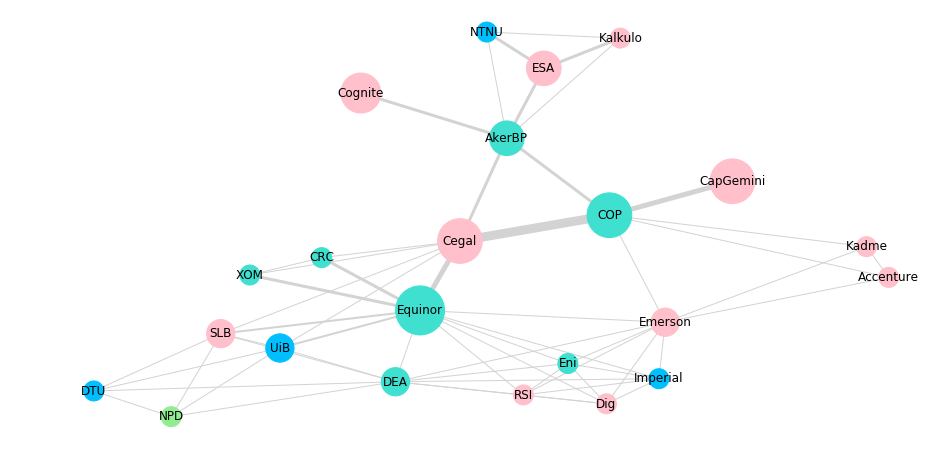

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G,
        with_labels=True,
        edge_color='lightgray',
        node_color=[colours[n] for n in t.values()],
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
        width=weights,
       )

In [21]:
pos = nx.kamada_kawai_layout(G)

/home/matt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


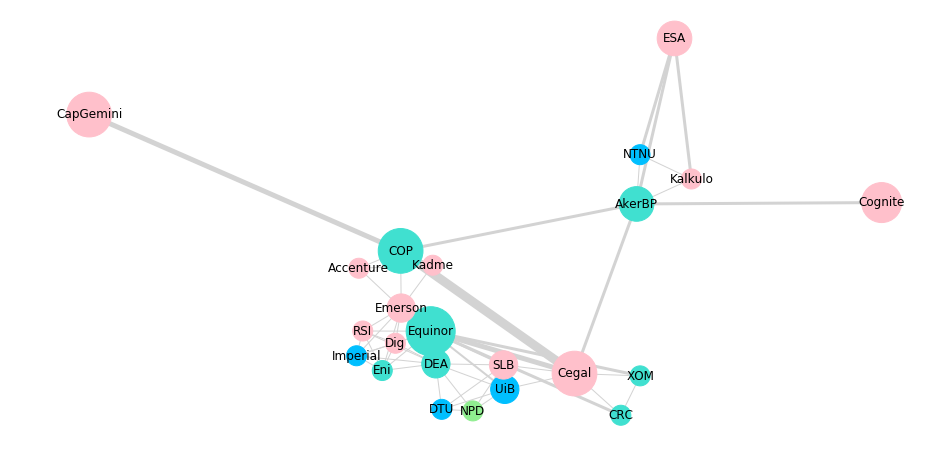

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G, pos,
        with_labels=True,
        node_color=[colours[n] for n in t.values()],
        edge_color='lightgray',
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
        width=weights,
       )

In [23]:
pos = nx.spring_layout(G)

/home/matt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


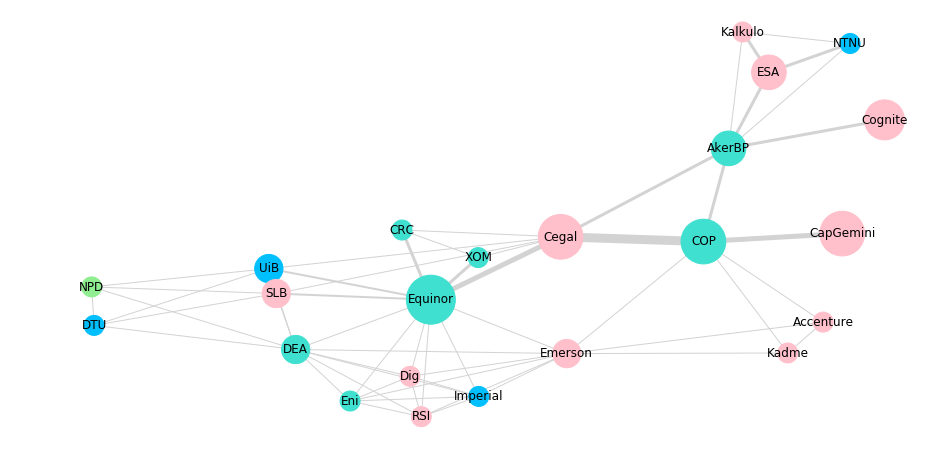

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G,
        pos,
        with_labels=True,
        node_color=[colours[n] for n in t.values()],
        edge_color='lightgray',
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
        width=weights,
       )